In [21]:
from qiskit.circuit import Gate, QuantumCircuit


class LookupGate(Gate):
    def __init__(self, M):
        self.M = M
        num_rows, num_cols = len(M), len(M[0])
        num_row_qubits = (num_rows - 1).bit_length()
        num_col_qubits = (num_cols - 1).bit_length()
        self.num_input_qubits = num_row_qubits + num_col_qubits
        self.num_output_qubits = 4  # Fixed number of output qubits
        num_qubits = self.num_input_qubits + self.num_output_qubits

        super().__init__("lookup", num_qubits, [])

        self._define()

    def _define(self, num_row_qubits, num_col_qubits, num_output_qubits):
        qc = QuantumCircuit(self.num_qubits, name="lookup")

        for row in range(2**num_row_qubits):
            for col in range(2**num_col_qubits):
                value = self.M[row][col]
                binary_value = format(value, "04b")

                # Set the control values for the row and column qubits
                control_values = int(
                    format(row, "0" + str(num_row_qubits) + "b")
                    + format(col, "0" + str(num_col_qubits) + "b"),
                    2,
                )

                # Apply MCX gates to write out the bitstring of the looked-up value
                for i in range(num_output_qubits):
                    if binary_value[i] == "1":
                        controls = list(range(num_row_qubits + num_col_qubits))
                        target = num_row_qubits + num_col_qubits + i
                        qc.mcx(controls, target, ctrl_state=control_values)

        self.definition = qc

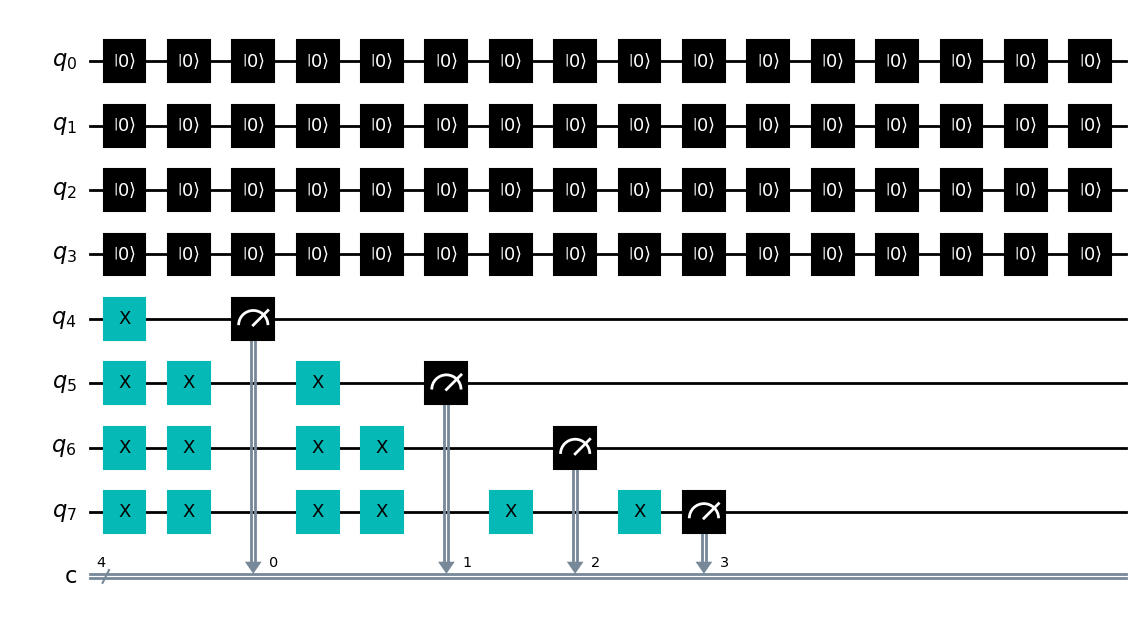

In [23]:
qc.decompose().draw("mpl")

In [22]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

M = [[0, 0, 0, 0], [2, 1, 1, 0], [4, 3, 2, 1], [8, 5, 4, 3]]

lookup_gate = LookupGate(M)
num_qubits = lookup_gate.num_qubits

qc = QuantumCircuit(num_qubits, lookup_gate.num_output_qubits)

# Add the custom lookup gate
qc.append(lookup_gate, range(num_qubits))

# Measure the output qubits
qc.measure(
    range(lookup_gate.num_input_qubits, num_qubits),
    range(lookup_gate.num_output_qubits),
)

# Execute the circuit
backend = Aer.get_backend("qasm_simulator")
result = execute(qc, backend).result()
plot_histogram(result.get_counts())

TypeError: _define() missing 3 required positional arguments: 'num_row_qubits', 'num_col_qubits', and 'num_output_qubits'